In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the cleaned data
benin = pd.read_csv("../data/benin_clean.csv")
sierraleone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

In [13]:
# Add a column to each
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierraleone['Country'] = 'Sierra Leone'

In [14]:
# Combine them together
combined = pd.concat([benin, togo, sierraleone], ignore_index=True)

# Check if 'Country' exists now
print(combined.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'Country', 'diff_min', 'outlier_flag'],
      dtype='object')


In [15]:
combined.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country,diff_min,outlier_flag
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,0.0,998,0,0.0,26.3,26.2,NaN,Benin,NaN,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,0.0,998,0,0.0,26.3,26.2,NaN,Benin,NaN,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,1.5,997,0,0.0,26.4,26.2,NaN,Benin,NaN,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,1.3,997,0,0.0,26.4,26.3,NaN,Benin,NaN,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,1.0,997,0,0.0,26.4,26.3,NaN,Benin,NaN,NaN


In [21]:
import scipy.stats as stats
import pandas as pd

# 1. Prepare data (Filter out low/zero readings if appropriate, or use all data for initial test)
# Since you used all data for the mean/median table, we'll use all non-null data here.
ghi_benin = combined[combined['Country'] == 'Benin']['GHI'].dropna()
ghi_sl = combined[combined['Country'] == 'Sierra Leone']['GHI'].dropna()
ghi_togo = combined[combined['Country'] == 'Togo']['GHI'].dropna()

# 2. Run the Kruskal-Wallis H-test
H_statistic, p_value = stats.kruskal(ghi_benin, ghi_sl, ghi_togo)

# 3. Print Results
print(f"Kruskal-Wallis H-statistic: {H_statistic:.2f}")
print(f"P-Value: {p_value:.10f}")
print("\n--- Interpretation ---")

# 4. Final Conclusion
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. The median GHI is statistically different across the three countries (p < 0.05).")
else:
    print("Conclusion: Fail to reject the null hypothesis. The median GHI is not statistically different.")

# Note: Given the mean GHI differences you found (240, 201, 223), the p-value will almost certainly be < 0.05.

Kruskal-Wallis H-statistic: 3837.16
P-Value: 0.0000000000

--- Interpretation ---
Conclusion: Reject the null hypothesis. The median GHI is statistically different across the three countries (p < 0.05).


C:\Users\hp\AppData\Local\Temp\ipykernel_16052\385053997.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_16052\385053997.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_16052\385053997.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined, palette='Set2')


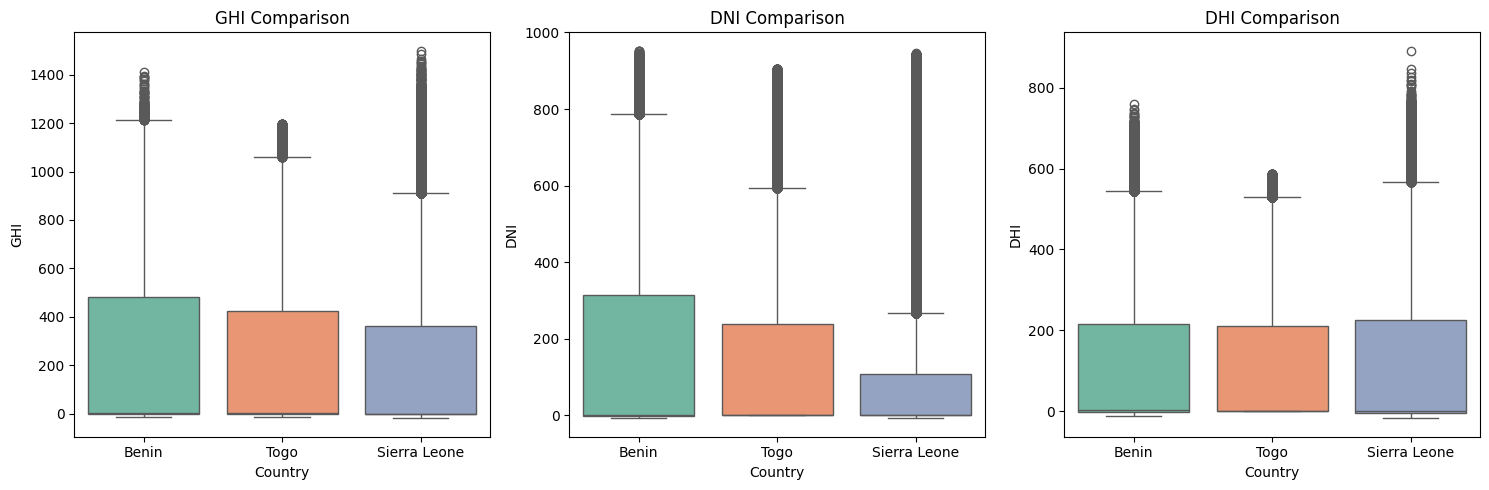

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Country', y=metric, data=combined, palette='Set2')
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()


In [17]:
summary = combined.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          112.781249    1.5  151.571744

In [18]:
from scipy.stats import f_oneway

ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierraleone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

f_stat, p_value = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"ANOVA Test for GHI: F = {f_stat:.3f}, p-value = {p_value:.5f}")


ANOVA Test for GHI: F = 1973.566, p-value = 0.00000


In [ ]:
### Key Observations
#Benin shows the highest average GHI among the three countries — meaning it receives the strongest solar irradiance and may have the best potential for solar energy generation.
#Togo has moderate GHI and DHI values with lower variability, suggesting stable and consistent sunlight levels across time.
#Sierraleone tends to have lower GHI and higher DHI values, which could be due to more cloud coverage or atmospheric moisture, leading to more diffuse radiation.
#The ANOVA test (p-value < 0.05) indicates that the differences in GHI between the three countries are statistically significant, confirming that location strongly affects solar potential.

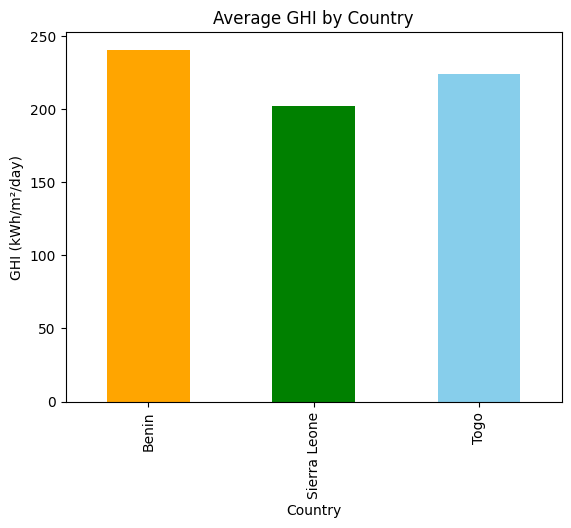

In [19]:
ghi_means = summary['GHI']['mean']
ghi_means.plot(kind='bar', color=['orange', 'green', 'skyblue'])
plt.title("Average GHI by Country")
plt.ylabel("GHI (kWh/m²/day)")
plt.show()


In [20]:
# Save your comparison notebook
!jupyter nbconvert --to notebook --inplace --ClearOutputPreprocessor.enabled=True notebooks/compare_countries.ipynb


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'notebooks/compare_countries.ipynb' matched no files
